In [5]:
from dotenv import load_dotenv
import sys

sys.path.append("../common")
load_dotenv()

True

In [10]:
import os
from langsmith_tracker import set_tracking
from langchain_print import stream_response
from multimodal import MultiModal

# 인스턴스를 생성할 때 필요한 매개변수를 전달합니다.
set_tracking(project_name="04.Models")

Langsmith 추적이 활성화되었습니다. [프로젝트명: 04.Models]


### Google AI chat models (gemini-pro)

Google AI 의 LLM 에 접근하려면 langchain-google-genai 통합 패키지의 `ChatGoogleGenerativeAI` 클래스를 사용합니다.  
  
`gemini` 와 `gemini-vision` 은 일정량을 무료로 제공합니다.  
  
설치 명령어는 아래와 같습니다.

In [ ]:
!poetry add langchain-google-genai

### API Key 발급받기

- 키 발급, Google AI Studio (https://aistudio.google.com/app/apikey)
- 사용자의 변수를 `GOOGLE_API_KEY` 로 .env 파일에 설정합니다.
- 모델 스펙
  - 링크 : https://ai.google.dev/gemini-api/docs/models/gemini?hl=ko

In [7]:
from langchain_google_genai import ChatGoogleGenerativeAI

# 모델 생성
llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash")

# 응답 생성
resposne = llm.stream("비트코인에 대해 간단히 설명해주세요. (50글자 이내)")

stream_response(resposne)

비트코인은 암호화 기술 기반의 분산형 디지털 화폐입니다.  중앙 은행 없이 블록체인 기술로 거래 기록을 관리합니다.


In [8]:
from langchain_core.prompts import PromptTemplate

# 모델 생성
llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash")

# 프롬프트 생성
prompt = PromptTemplate.from_template("예/아니오 질문에 답하세요. {name}는 코인입니까?")

# 체인 생성
chain = prompt | llm

# 체인 실행
stream_response(chain.stream({"name": "DOGE"}))

네.


### Safety Settings

Gemini 모델에는 기본 안전 설정(Safety Setting) 이 있고, 이를 재정의 할 수 있습니다.

In [ ]:
from langchain_google_genai import (
    ChatGoogleGenerativeAI,
    HarmBlockThreshold,
    HarmCategory,
)

llm = ChatGoogleGenerativeAI(
    model="gemini-1.5-flash",
    safety_settings={
        # 위험한 콘텐츠에 대한 차잔 임계값을 설정
        # 이 경우 위험한 콘텐츠를 차단하지 않도록 설정(그럼에도 기본 설정이 되어 있을 수 있음)
        HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT: HarmBlockThreshold.BLOCK_NONE,
        HarmCategory.HARM_CATEGORY_HATE_SPEECH: HarmBlockThreshold.BLOCK_NONE,
        HarmCategory.HARM_CATEGORY_HARASSMENT: HarmBlockThreshold.BLOCK_NONE,
        HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: HarmBlockThreshold.BLOCK_NONE,
    },
)

### Batch 단위 실행

한번에 모아서 질문을 받는 방법입니다.

In [9]:
# 모델 생성
llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash")

response = llm.batch(["비트코인의 창시자는?", "주요 코인 5개를 나열하세요."])

for token in response:
    print(token.content)

비트코인의 창시자는 **사토시 나카모토(Satoshi Nakamoto)**라는 이름으로 알려져 있지만, 실제 신원은 알려지지 않았습니다.  사토시 나카모토는 한 사람일 수도 있고, 여러 사람으로 구성된 그룹일 수도 있습니다.  그의(혹은 그들의) 정체는 여전히 미스터리로 남아 있습니다.

주요 암호화폐 5개는 시가총액과 유동성, 그리고 시장 영향력을 기준으로 변동될 수 있지만, 일반적으로 다음과 같이 꼽힙니다.

1. **비트코인 (BTC):** 최초의 암호화폐이자 시가총액이 가장 큰 암호화폐입니다.
2. **이더리움 (ETH):** 스마트 컨트랙트 플랫폼으로, 많은 탈중앙화 애플리케이션(dApps)의 기반이 됩니다.
3. **테더 (USDT):** 달러와 1:1로 고정된 가치를 가진 스테이블코인입니다.
4. **바이낸스 코인 (BNB):** 바이낸스 거래소의 자체 토큰입니다.
5. **XRP (리플):** 국제 송금을 위한 솔루션으로 사용되는 암호화폐입니다.


**주의:**  위 5개 코인은 일반적인 인식을 반영한 것이며, 시장 상황에 따라 순위가 바뀔 수 있습니다.  투자 결정 전에 항상 독자적인 조사를 수행하는 것이 중요합니다.



### MultiModal Model

In [15]:
# 모델 생성
llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash")

system_prompt = "당신은 코인 전문가입니다. 당신의 임무는 주어진 이미지를 가지고 연관된 코인에 대해 정보를 주는 것입니다."

user_prompt = "다음의 이미지에 대한 코인을 찾아주세요."

# 멀티 모달 객체 생성
multimodal_gemini = MultiModal(
    llm, system_prompt=system_prompt, user_prompt=user_prompt
)


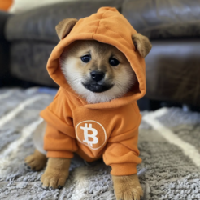

이미지에는 비트코인(BTC) 기호가 있는 강아지가 있습니다.  비트코인은 2009년에 만들어진 암호화폐이며,  세계에서 가장 가치 있는 암호화폐 중 하나입니다.  분산형 원장 기술인 블록체인을 사용하여 거래가 기록되고 확인됩니다.  비트코인은 중앙 은행이나 정부의 통제를 받지 않고,  피어투피어(P2P) 네트워크를 통해 거래됩니다.

이미지의 강아지는 비트코인과 직접적으로 관련된 코인이 아닙니다.  다만, 비트코인을 상징하는 기호를 입고 있어 비트코인을 나타내는 것으로 해석될 수 있습니다.  따라서 이미지에서 찾을 수 있는 코인은 **비트코인(BTC)**입니다.


In [16]:
# 이미지 경로(파일의 경로, URL 등) 입력
IMAGE_URL = "./images/dog.png"

image_response = multimodal_gemini.stream(IMAGE_URL)

stream_response(image_response)